In [3]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv(r'c:\Users\Uday\Downloads\dataset - 2020-09-24 (1).csv')

data.fillna(0, inplace=True)
data['Age'] = data['Age'].astype('int64')
data['Interceptions'] = data['Interceptions'].astype('int64')
data['Clean sheets'] = data['Clean sheets'].astype('int64')
data['Duels won'] = data['Duels won'].astype('int64')
data['Jersey Number'] = data['Jersey Number'].astype('int64')
data


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1,Arsenal,Goalkeeper,Germany,28,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,0.0
1,Matt Macey,33,Arsenal,Goalkeeper,England,26,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
2,Rúnar Alex Rúnarsson,13,Arsenal,Goalkeeper,Iceland,25,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
3,Héctor Bellerín,2,Arsenal,Defender,Spain,25,160,90,37,7,...,0.0,0.0,0.0,0.0,0.0,0.0,23,0,125,8.0
4,Kieran Tierney,3,Arsenal,Defender,Scotland,23,16,7,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7,Wolverhampton-Wanderers,Forward,Portugal,20,31,14,7,3,...,0.0,0.0,0.0,0.0,0.0,0.0,3,0,16,5.0
567,Raúl Jiménez,9,Wolverhampton-Wanderers,Forward,Mexico,29,78,32,23,32,...,0.0,0.0,0.0,0.0,0.0,0.0,7,0,81,52.0
568,Adama Traoré,37,Wolverhampton-Wanderers,Forward,Spain,24,105,27,47,5,...,0.0,0.0,0.0,0.0,0.0,0.0,4,0,80,13.0
569,Fábio Silva,17,Wolverhampton-Wanderers,Forward,Portugal,18,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0


In [20]:
midfs = data[data['Position'] == 'Midfielder']

In [21]:
mid_cols = [
    'Assists',
    'Passes per match',
    'Big chances created',
    'Through balls',
    'Accurate long balls'
]

midfs = data[mid_cols]
midfs


,Assists,Passes per match,Big chances created,Through balls,Accurate long balls
0,0,27.86,0.0,0.0,234.0
1,0,0.00,0.0,0.0,0.0
2,0,0.00,0.0,0.0,0.0
3,18,44.53,28.0,31.0,144.0
4,1,32.44,1.0,0.0,22.0
...,...,...,...,...,...
566,4,12.87,5.0,0.0,0.0
567,13,27.03,26.0,0.0,0.0
568,12,13.66,13.0,0.0,0.0
569,0,1.00,0.0,0.0,0.0


In [23]:
scaler = MinMaxScaler()
midfs_scaled = midfs.copy()
midfs_scaled[mid_cols] = scaler.fit_transform(midfs[mid_cols])

midfs_scaled["Efficiency Score"] = midfs_scaled[mid_cols].mean(axis=1)
midfs_scaled["Efficiency Score"]

0      0.080655
1      0.000000
2      0.000000
3      0.245571
4      0.072575
         ...   
566    0.045965
567    0.139444
568    0.083112
569    0.002030
570    0.000000
Name: Efficiency Score, Length: 571, dtype: float64

In [25]:
top_midfielders = (
    midfs_scaled
    .sort_values("Efficiency Score", ascending=False)
    .head(7)
)
top_midfielders

,Assists,Passes per match,Big chances created,Through balls,Accurate long balls,Efficiency Score
335,0.797619,0.547107,1.000000,0.839744,0.224395,0.681773
304,0.547619,0.532284,0.505155,0.826923,0.611426,0.604681
302,1.000000,0.304569,0.474227,0.705128,0.453937,0.587572
13,0.642857,0.617157,0.670103,0.775641,0.142048,0.569561
537,0.416667,0.473503,0.360825,0.673077,0.763767,0.537568
365,0.619048,0.440914,0.701031,0.570513,0.329902,0.532281
185,0.535714,0.277157,0.701031,0.608974,0.104992,0.445574


In [35]:
top_midfielders["Player"] = data.loc[top_midfielders.index, "Name"]
top_midfielders.set_index("Player")

,Assists,Passes per match,Big chances created,Through balls,Accurate long balls,Efficiency Score
Player,,,,,,
Kevin De Bruyne,0.797619,0.547107,1.000000,0.839744,0.224395,0.681773
Jordan Henderson,0.547619,0.532284,0.505155,0.826923,0.611426,0.604681
James Milner,1.000000,0.304569,0.474227,0.705128,0.453937,0.587572
Mesut Özil,0.642857,0.617157,0.670103,0.775641,0.142048,0.569561
Mark Noble,0.416667,0.473503,0.360825,0.673077,0.763767,0.537568
Juan Mata,0.619048,0.440914,0.701031,0.570513,0.329902,0.532281
Gylfi Sigurdsson,0.535714,0.277157,0.701031,0.608974,0.104992,0.445574


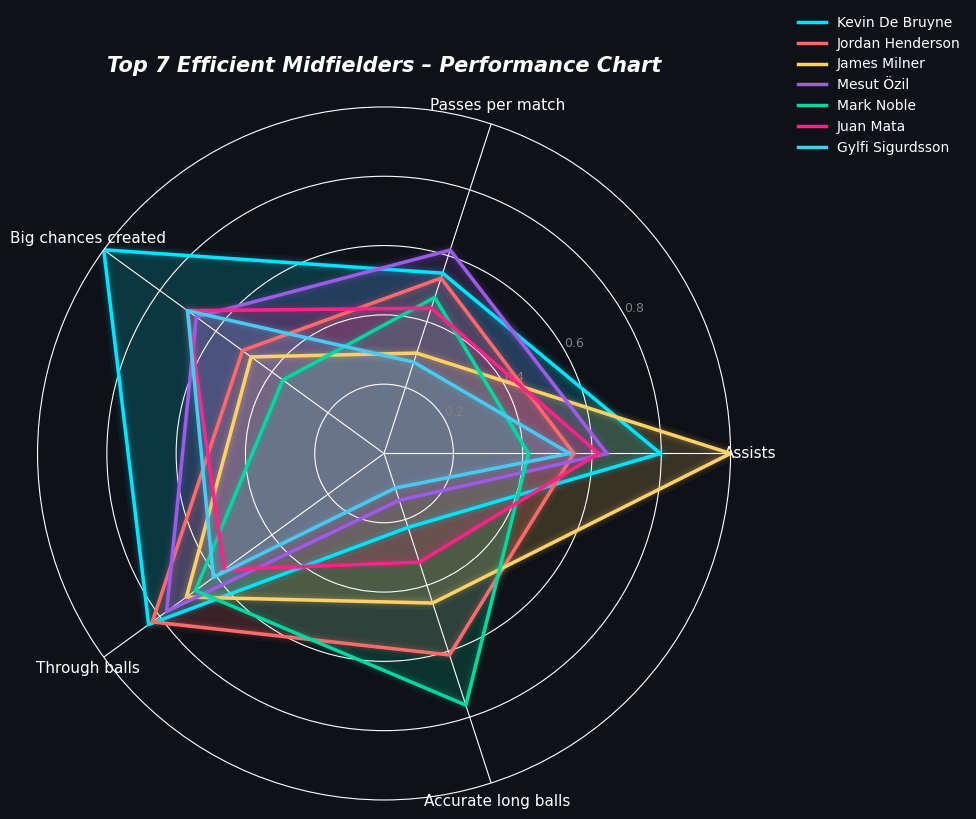

In [48]:
num_vars = len(mid_cols)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]


plt.style.use("dark_background")
fig = plt.figure(figsize=(9, 9))
ax = plt.subplot(111, polar=True)

fig.patch.set_facecolor("#0e1117")
ax.set_facecolor("#0e1117")
player_colors = [
    "#00E5FF",  # Neon Cyan
    "#FF6B6B",  # Coral Red
    "#FFD166",  # Warm Yellow
    "#9B5DE5",  # Electric Purple
    "#06D6A0",  # Mint Green
    "#F72585",  # Hot Pink
    "#4CC9F0"   # Sky Blue
]



for i, (_, row) in enumerate(top_midfielders.iterrows()):
    values = row[mid_cols].tolist()
    values += values[:1]
    color = player_colors[i]

    
    for lw, alpha in zip([10, 6, 3], [0.05, 0.08, 0.12]):
        ax.plot(
            angles,
            values,
            linewidth=lw,
            alpha=alpha,
            color = color
        )

   
    ax.plot(
        angles,
        values,
        linewidth=2.5,
        label=row["Player"],
        color = color
    )

    ax.fill(
        angles,
        values,
        alpha=0.18,
        color = color
    )


ax.set_thetagrids(
    np.degrees(angles[:-1]),
    mid_cols,
    fontsize=11,
    color="white"
)

ax.set_rlabel_position(30)
plt.yticks(
    [0.2, 0.4, 0.6, 0.8],
    ["0.2", "0.4", "0.6", "0.8"],
    color="gray",
    fontsize=9
)
plt.ylim(0, 1)


ax.set_title(
    "Top 7 Efficient Midfielders – Performance Chart",
    fontsize=15,
    fontweight="bold",
    fontstyle = 'italic',
    pad=25,
    color="white"
)

plt.legend(
    loc="upper right",
    bbox_to_anchor=(1.35, 1.15),
    frameon=False,
    fontsize=10
)

plt.show()